# Latitude-depth sections in ESM4

A short collection of code to draw latitude-depth sections of ESM4 data.  
The zonal dimension is reduced by taking either a single longitude, the volume-weighted mean, or the integral.  
Each plot is a colour mesh of one variable (here phytoplankon), overlain with a colour contour of another variable (here temperature).

In [73]:
# Load certain useful packages in python
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [74]:
# Specify the location of the files for cobalt and ocean variables
rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'
name_cobalt = 'ocean_cobalt_omip_tracers_month_z'
name_mom6 = 'ocean_monthly_z'
ext = '/av/monthly_5yr/'
time = '.0941-0945.01'
path_cobalt = rootdir+name_cobalt+ext+name_cobalt+time+'.nc'
path_mom6 = rootdir+name_mom6+ext+name_mom6+time+'.nc'

In [75]:
# Load data
ds_cobalt = xr.open_dataset(path_cobalt, decode_times='False')
ds_mom6 = xr.open_dataset(path_mom6, decode_times='False')

# Create new dataset with variables that are needed (in our case, thetao, phyc, and volcello)
ds = xr.merge([ds_cobalt.phyc, ds_mom6.volcello, ds_mom6.thetao])
ds = ds.isel(time=0)

/nbhome/gam/miniconda/envs/mom6/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)


In [76]:
# Set some global attributes
pcolor_range = [0,0.005]
pcolor_range_int = [0,1e11] # Need larger range when zonal sum is calculated
pcolor_cmap = 'Greens'
contour_levs = np.arange(0,30,5)
contour_cmap = 'bwr'
ylims = [700,0]

### Section at specific longitude

(700, 0)

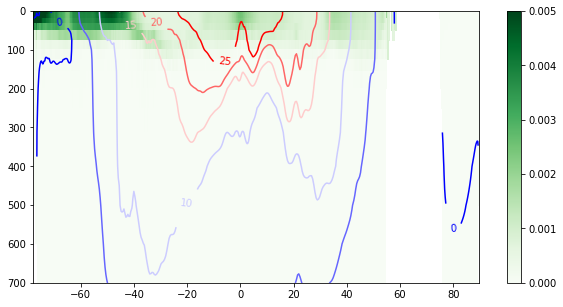

In [77]:
lon = -160
pcolor_var = ds.phyc.sel(xh=lon,method='nearest')
contour_var = ds.thetao.sel(xh=lon,method='nearest')
fig, ax = plt.subplots(figsize=(10,5))
im1 = ax.pcolormesh(ds.yh,ds.z_l,pcolor_var,cmap=pcolor_cmap)
im1.set_clim(pcolor_range[0],pcolor_range[1])
fig.colorbar(im1)
im2 = ax.contour(ds.yh,ds.z_l,contour_var,levels = contour_levs, cmap=contour_cmap)
ax.clabel(im2,inline=1,fontsize=10, fmt = '%i')
ax.invert_yaxis()

# Because everything happens in the surface, lets reduce the range of the yaxis
# [This may need to be adapted or adjusted depending on what is being plotted]
ax.set_ylim(ylims[0],ylims[1])

### Volume-weighted zonal mean

In [ ]:
# Volume-weighted zonal mean of phytoplankton
vC1 = ds.phyc*ds.volcello
pcolor_var = vC1.sum(dim='xh', skipna=True)/ds.volcello.sum(dim='xh', skipna=True)
# Volume-weighted zonal mean of temperature
vC2 = ds.thetao*ds.volcello
contour_var = vC2.sum(dim='xh', skipna=True)/ds.volcello.sum(dim='xh', skipna=True)

fig, ax = plt.subplots(figsize=(10,5))
im1 = ax.pcolormesh(ds.yh,ds.z_l,pcolor_var,cmap=pcolor_cmap)
im1.set_clim(pcolor_range[0],pcolor_range[1])
fig.colorbar(im1)
im2 = ax.contour(ds.yh,ds.z_l,contour_var,levels = contour_levs, cmap=contour_cmap)
ax.clabel(im2,inline=1,fontsize=10, fmt = '%i')
ax.invert_yaxis()
ax.set_ylim(ylims[0],ylims[1])

### Zonal integral (overlain with zonal mean contours)

In [ ]:
# Zonal integral of phytoplankton
vC1 = ds.phyc*ds.volcello
pcolor_var = vC1.sum(dim='xh', skipna=True)
# Volume-weighted zonal mean of temperature
vC2 = ds.thetao*ds.volcello
contour_var = vC2.sum(dim='xh', skipna=True)/ds.volcello.sum(dim='xh', skipna=True)

fig, ax = plt.subplots(figsize=(10,5))
im1 = ax.pcolormesh(ds.yh,ds.z_l,pcolor_var,cmap=pcolor_cmap)
im1.set_clim(pcolor_range_int[0],pcolor_range_int[1])
im2 = ax.contour(ds.yh,ds.z_l,contour_var,levels = contour_levs, cmap=contour_cmap)
ax.clabel(im2,inline=1,fontsize=10, fmt = '%i')
ax.invert_yaxis()
ax.set_ylim(ylims[0],ylims[1])

***
## Adjustments

Here are some plausible adjustments that you may wish to make in the plots.

#### Plot for a different month
We are using the 5-year average files, so that the variables for each month are stored in  separate netcdf files.
So, to plot the variables for a different month, you will need to load the data for a different file, meaning that you should change:  
` time = '.0941-0945.01' `  
to  
` time = '.0941-0945.[month of interest]' `  

#### Plot salinity (or density) rather than temperature
This is a simple case of changing each reference to `thetao` to `so`, or the name of the density variable that you have loaded or calculated.